In [3]:
import sympy as s
T, a, b, c =s.symbols("T a b c")
s.diff (-((T-a)**2/b) + c, T) # dk/dT to find optimum temperature


-(2*T - 2*a)/b

Scenario 1 (Constant Temperature):
________________________________________
Time to 50% degradation: 1.0 days
Time to 99% degradation: 6.0 days

Scenario 2 (Fluctuating Temperature):
________________________________________
Time to 50% degradation: 1.0 days
Time to 99% degradation: 12.0 days


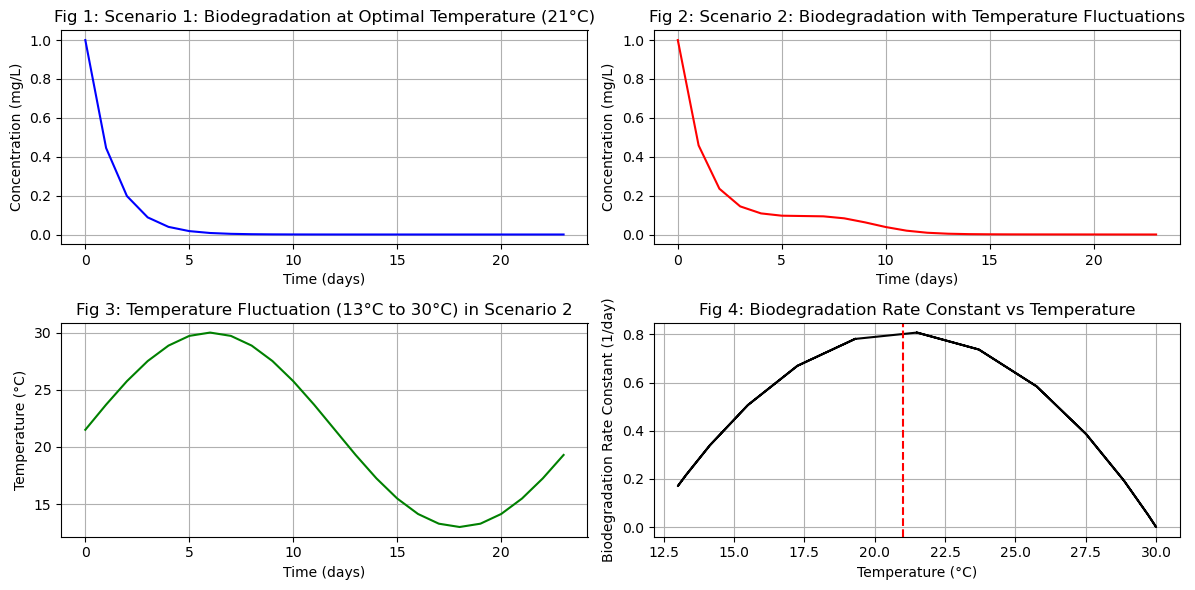

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants for the model
a = 21     # Optimal temperature (degrees Celsius)
b = 100    # Parameter for temperature dependence
c = 0.81   # Constant for the degradation rate

#  Model function for scenario 1 (constant optimal temperature)
def model_constant(y, t):
    X = y[0]  # Concentration of toxic substance, un
    P = y[1]  # Concentration of the product
    k = c - ((a - a)**2 / b)  # Degradation rate constant at optimal temperature
    dXdt = -k * X  # Rate of degradation of toxic substance
    dPdt = k * X   # Rate of product formation
    return [dXdt, dPdt]

# Model function for scenario 2 (temperature fluctuations)
def model_fluctuating(y, t):
    X = y[0]  # Concentration of toxic substance
    P = y[1]  # Concentration of the product
    A = 8.5     # Amplitude for the sine wave       A = (Tmax - Tmin)/2 = 8.5
    f = 1/24  # Frequency (1 cycle per day)
    D = 21.5  # Average temperature                 D = (Tmin + Tmax)/2 
    T_given_time = A * np.sin(2 * np.pi * f * t) + D  # Time-dependent temperature
    k = -((T_given_time - a)**2 / b) + c  # Degradation rate based on temperature
    dXdt = -k * X  # Rate of degradation of toxic substance
    dPdt = k * X   # Rate of product formation
    return [dXdt, dPdt]

# Time array for the integration
t = np.linspace(0, 23, 24)  # 24 days

# Initial conditions (1 mg/L of toxic substance, 0 mg/L of product)
X0 = 1
P0 = 0
initial_conditions = [X0, P0]

# Solving for scenario 1 (constant optimal temperature)
results_constant = odeint(model_constant, initial_conditions, t)
X_constant = results_constant[:, 0]
P_constant = results_constant[:, 1]

# Solving for scenario 2 (fluctuating temperature)
results_fluctuating = odeint(model_fluctuating, initial_conditions, t)
X_fluctuating = results_fluctuating[:, 0]
P_fluctuating = results_fluctuating[:, 1]

# Find time for 50% and 99% degradation in both scenarios
def find_degradation_time(X, initial_concentration):
    # Find the time when concentration drops to 50% or 99% of the initial concentration
    time_50 = t[np.where(X <= 0.5 * initial_concentration)[0][0]]  # First occurrence of 50% degradation
    time_99 = t[np.where(X <= 0.01 * initial_concentration)[0][0]]  # First occurrence of 99% degradation
    return time_50, time_99

# For scenario 1 (constant temperature)
time_50_constant, time_99_constant = find_degradation_time(X_constant, X0)

# For scenario 2 (fluctuating temperature)
time_50_fluctuating, time_99_fluctuating = find_degradation_time(X_fluctuating, X0)

# Print the times for 50% and 99% degradation
print(f"Scenario 1 (Constant Temperature):")
print("_"*40)
print(f"Time to 50% degradation: {time_50_constant} days")
print(f"Time to 99% degradation: {time_99_constant} days")

print(f"\nScenario 2 (Fluctuating Temperature):")
print("_"*40)
print(f"Time to 50% degradation: {time_50_fluctuating} days")
print(f"Time to 99% degradation: {time_99_fluctuating} days")

# Plotting the results for scenario 1 (constant optimal temperature)
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(t, X_constant, '-b', label="Toxic Substance (X)")
plt.xlabel('Time (days)')
plt.ylabel('Concentration (mg/L)')
plt.title('Fig 1: Scenario 1: Biodegradation at Optimal Temperature (21°C)')
plt.grid(True)

# Plotting the results for scenario 2 (fluctuating temperature)
plt.subplot(2, 2, 2)
plt.plot(t, X_fluctuating, '-r', label="Toxic Substance (X)")
plt.xlabel('Time (days)')
plt.ylabel('Concentration (mg/L)')
plt.title('Fig 2: Scenario 2: Biodegradation with Temperature Fluctuations')
plt.grid(True)

# Plotting temperature fluctuation in scenario 2
plt.subplot(2, 2, 3) 
plt.plot(t, T_given_time, '-g')
plt.xlabel('Time (days)')
plt.ylabel('Temperature (°C)')
plt.title('Fig 3: Temperature Fluctuation (13°C to 30°C) in Scenario 2')
plt.grid(True)

# Plot the biodegradation rate constant as a function of temperature (for scenario 2)
plt.subplot(2, 2, 4)
biodegradation_constant = c - ((T_given_time - a)**2 / b)
plt.plot(T_given_time, biodegradation_constant, '-k')
plt.axvline(a, color='r', linestyle='--', label='Optimal Temperature (21°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Biodegradation Rate Constant (1/day)')
plt.title('Fig 4: Biodegradation Rate Constant vs Temperature')
plt.grid(True)
plt.tight_layout()

# Show plots
plt.show()
